In [13]:
# Import the necessary packages
import math

import matplotlib.pyplot as plt

In [14]:
# local module for linear algebra
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

We implement the refined global optimizer with multi-start by following the steps from above.

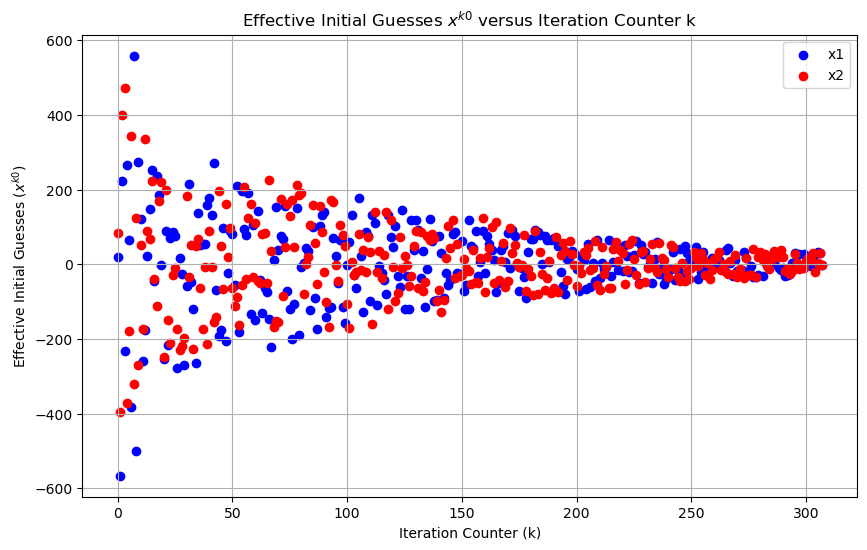

Optimal Solution:
x1 = -8.247038878001527e-09
x2 = -9.665487719981334e-09
Minimum value of the Griewank function: 0.0
Number of total iterations: 308


In [17]:
# Import .py file
from opg3py import * 

# Plot the solution for 10 warm-up iterations
plot_solution_10()

Based of the set seed, it can be seen that the optimal solution is with x1 being equal to -8.247038878001527e-09 and x2 being equal to -9.665487719981334e-09 and the Griewank function being equal to 0. 

With the given tolerance we find, that the effective initial guesses convergence to the global minimum of f(0,0) = 0 after 308 iterations.

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

This question follows the same code from question 1 with the only difference being, that the number of warm-up iterations is changed from 10 to 100.

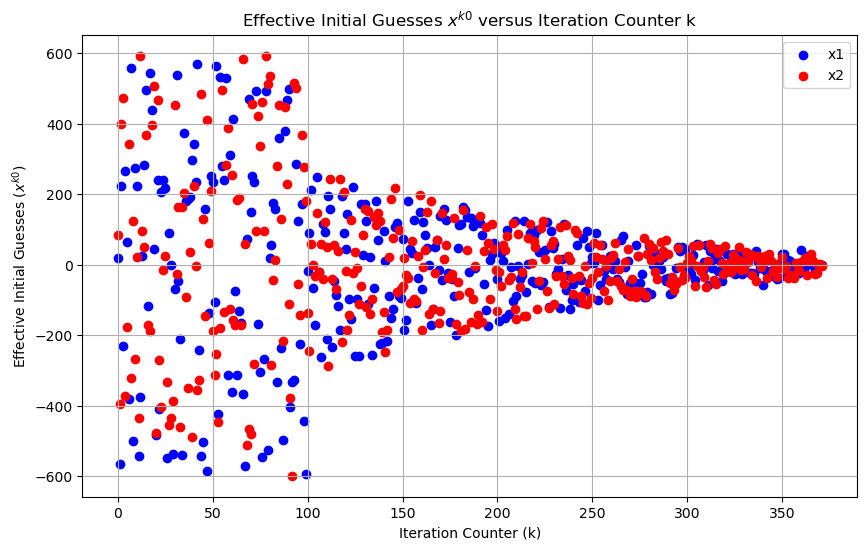

Optimal Solution:
x1 = -7.531733637972062e-09
x2 = -1.2748584510687073e-08
Minimum value of the Griewank function: 0.0
Number of total iterations: 372


In [18]:
# Plot the solution for 100 warm-up iterations
plot_solution_100()

When the number of warm-up iterations is set to 100 it takes a total og 372 iterations before the initial guesses convergence to the global minimum. These results indicate, that convergence is faster with 10 warm-up iterations compared to 100.